# Polars Tutorial

<img src="https://raw.githubusercontent.com/arad1367/UniLi_sources/main/IMG/logo.jpg" 
     alt="University of Liechtenstein" 
     width="350" 
     height="auto">

### About This Tutorial

This tutorial is prepared by **Dr. Pejman Ebrahimi** for the "Deep Learning and Advanced AI Techniques" course at the University of Liechtenstein. 

For more resources and notebooks related to this course, please visit Moodle or GitHub repository: [Course Materials](https://github.com/arad1367/University-of-Liechtenstein/tree/main/Deep%20Learning%20and%20Advanced%20AI).

You can reach out to Dr. Pejman Ebrahimi via email: [pejman.ebrahimi@uni.li](mailto:pejman.ebrahimi@uni.li).

### 1. Introduction to Polars

> Polars is a modern, high-performance DataFrame library written in Rust. It is designed for speed and efficiency, making it an excellent alternative to Pandas for handling large datasets. Polars leverages multithreading and lazy evaluation to optimize performance.

Key Features:
- Extremely fast compared to Pandas (up to 10x faster in some cases).
- Supports lazy evaluation for optimizing query execution.
- Handles missing data efficiently.
- Provides SQL-like syntax for data manipulation.
- Integrates well with other libraries like NumPy and Matplotlib.

### 2. Installation and Import

In [ ]:
# Install Polars (if not already installed)
%pip install polars
# !pip install polars   -> Colab 

# Import Polars
import polars as pl
print(f"Polars version: {pl.__version__}")

   ---------------------------------------- 0.0/35.6 MB ? eta -:--:--
   ---------------------------------------- 0.2/35.6 MB 3.1 MB/s eta 0:00:12
    --------------------------------------- 0.8/35.6 MB 8.8 MB/s eta 0:00:04
   - -------------------------------------- 1.8/35.6 MB 12.4 MB/s eta 0:00:03
   -- ------------------------------------- 2.2/35.6 MB 12.9 MB/s eta 0:00:03
   --- ------------------------------------ 2.7/35.6 MB 11.7 MB/s eta 0:00:03
   ---- ----------------------------------- 3.9/35.6 MB 13.8 MB/s eta 0:00:03
   ----- ---------------------------------- 4.8/35.6 MB 14.5 MB/s eta 0:00:03
   ------ --------------------------------- 5.9/35.6 MB 15.7 MB/s eta 0:00:02
   ------- -------------------------------- 6.6/35.6 MB 15.7 MB/s eta 0:00:02
   -------- ------------------------------- 7.6/35.6 MB 16.2 MB/s eta 0:00:02
   --------- ------------------------------ 8.5/35.6 MB 16.5 MB/s eta 0:00:02
   --------- ------------------------------ 8.8/35.6 MB 16.5 MB/s eta 0:00


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\Pejman\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Polars version: 1.26.0


In [4]:
print(f"Polars version in this notebook is {pl.__version__}")

Polars version in this notebook is 1.26.0


### 3. Core Data Structures in Polars

* A Series in Polars is a one-dimensional array capable of holding any data type.
* A DataFrame in Polars is a two-dimensional tabular data structure with rows and columns.

In [5]:
# Creating a Series
data = pl.Series([10, 20, 30, 40])
print(data)

shape: (4,)
Series: '' [i64]
[
	10
	20
	30
	40
]


In [6]:
# Creating a DataFrame
data = {
    'Product': ['Laptop', 'Smartphone', 'Tablet'],
    'Price': [1200, 800, 400],
    'Stock': [50, 200, 100]
}
df = pl.DataFrame(data)
print(df)

shape: (3, 3)
┌────────────┬───────┬───────┐
│ Product    ┆ Price ┆ Stock │
│ ---        ┆ ---   ┆ ---   │
│ str        ┆ i64   ┆ i64   │
╞════════════╪═══════╪═══════╡
│ Laptop     ┆ 1200  ┆ 50    │
│ Smartphone ┆ 800   ┆ 200   │
│ Tablet     ┆ 400   ┆ 100   │
└────────────┴───────┴───────┘


### 4. Loading Real Datasets

In [12]:
# Load Employee Data
employee_data_url = "https://raw.githubusercontent.com/arad1367/WAC_November-2023/refs/heads/main/Employee_Data_missing.csv"
employee_df = pl.read_csv(employee_data_url)
print("Employee Data:")
print(employee_df.head())

# Load Drug Data
drug_data_url = "https://raw.githubusercontent.com/arad1367/WAC_November-2023/refs/heads/main/drug200_missing.csv"
drug_df = pl.read_csv(drug_data_url)
print("\nDrug Data:")
print(drug_df.head())

Employee Data:
shape: (5, 7)
┌────────────┬────────────────┬─────┬─────────────┬────────┬─────────────┬───────────────────┐
│ EmployeeID ┆ Name           ┆ Age ┆ Department  ┆ Salary ┆ JoiningDate ┆ PerformanceRating │
│ ---        ┆ ---            ┆ --- ┆ ---         ┆ ---    ┆ ---         ┆ ---               │
│ i64        ┆ str            ┆ i64 ┆ str         ┆ i64    ┆ str         ┆ f64               │
╞════════════╪════════════════╪═════╪═════════════╪════════╪═════════════╪═══════════════════╡
│ 1          ┆ John Doe       ┆ 30  ┆ Engineering ┆ 75000  ┆ 5/15/2020   ┆ 4.5               │
│ 2          ┆ Jane Smith     ┆ 28  ┆ Marketing   ┆ 60000  ┆ 10/20/2019  ┆ 3.8               │
│ 3          ┆ Bob Johnson    ┆ 35  ┆ Finance     ┆ 80000  ┆ 2/10/2021   ┆ 4.2               │
│ 4          ┆ Alice Williams ┆ 32  ┆ Engineering ┆ 82000  ┆ 9/5/2018    ┆ 4.7               │
│ 5          ┆ Chris Brown    ┆ 28  ┆ Finance     ┆ 75000  ┆ 1/12/2022   ┆ 3.5               │
└────────────┴───────

### 5. Data Exploration with Expressions

* Polars uses expressions for efficient and concise data exploration.

In [9]:
# Calculate the average salary across all employees
average_salary = employee_df.select(pl.col('Salary').mean())
print(average_salary)

shape: (1, 1)
┌──────────────┐
│ Salary       │
│ ---          │
│ f64          │
╞══════════════╡
│ 77520.833333 │
└──────────────┘


### 6. Data Cleaning with Polars

* Polars provides robust tools for handling missing or inconsistent data.

In [11]:
# Check for missing values
print("Missing Values in Employee Data:")
print(employee_df.null_count())

# Drop rows with missing values
cleaned_employee_df = employee_df.drop_nulls()
print("\nCleaned Employee Data:")
print(cleaned_employee_df)

Missing Values in Employee Data:
shape: (1, 7)
┌────────────┬──────┬─────┬────────────┬────────┬─────────────┬───────────────────┐
│ EmployeeID ┆ Name ┆ Age ┆ Department ┆ Salary ┆ JoiningDate ┆ PerformanceRating │
│ ---        ┆ ---  ┆ --- ┆ ---        ┆ ---    ┆ ---         ┆ ---               │
│ u32        ┆ u32  ┆ u32 ┆ u32        ┆ u32    ┆ u32         ┆ u32               │
╞════════════╪══════╪═════╪════════════╪════════╪═════════════╪═══════════════════╡
│ 0          ┆ 0    ┆ 0   ┆ 2          ┆ 2      ┆ 1           ┆ 1                 │
└────────────┴──────┴─────┴────────────┴────────┴─────────────┴───────────────────┘

Cleaned Employee Data:
shape: (47, 7)
┌────────────┬────────────────┬─────┬─────────────┬────────┬─────────────┬───────────────────┐
│ EmployeeID ┆ Name           ┆ Age ┆ Department  ┆ Salary ┆ JoiningDate ┆ PerformanceRating │
│ ---        ┆ ---            ┆ --- ┆ ---         ┆ ---    ┆ ---         ┆ ---               │
│ i64        ┆ str            ┆ i64 ┆ str

In [14]:
# Fill missing values in 'Cholesterol' with 'Unknown' and 'Na_to_K' with 0
filled_drug_df = drug_df.with_columns(
    pl.col('Cholesterol').fill_null('Unknown'),
    pl.col('Na_to_K').fill_null(0)
)
print("\nFilled Drug Data:")
print(filled_drug_df)


Filled Drug Data:
shape: (200, 6)
┌─────┬─────┬────────┬─────────────┬─────────┬───────┐
│ Age ┆ Sex ┆ BP     ┆ Cholesterol ┆ Na_to_K ┆ Drug  │
│ --- ┆ --- ┆ ---    ┆ ---         ┆ ---     ┆ ---   │
│ i64 ┆ str ┆ str    ┆ str         ┆ f64     ┆ str   │
╞═════╪═════╪════════╪═════════════╪═════════╪═══════╡
│ 23  ┆ F   ┆ HIGH   ┆ HIGH        ┆ 25.355  ┆ DrugY │
│ 47  ┆ M   ┆ LOW    ┆ HIGH        ┆ 13.093  ┆ drugC │
│ 47  ┆ M   ┆ LOW    ┆ HIGH        ┆ 10.114  ┆ drugC │
│ 28  ┆ F   ┆ NORMAL ┆ HIGH        ┆ 7.798   ┆ drugX │
│ 61  ┆ F   ┆ LOW    ┆ HIGH        ┆ 18.043  ┆ DrugY │
│ …   ┆ …   ┆ …      ┆ …           ┆ …       ┆ …     │
│ 56  ┆ F   ┆ LOW    ┆ HIGH        ┆ 11.567  ┆ drugC │
│ 16  ┆ M   ┆ LOW    ┆ HIGH        ┆ 12.006  ┆ drugC │
│ 52  ┆ M   ┆ NORMAL ┆ HIGH        ┆ 9.894   ┆ drugX │
│ 23  ┆ M   ┆ NORMAL ┆ NORMAL      ┆ 14.02   ┆ drugX │
│ 40  ┆ F   ┆ LOW    ┆ NORMAL      ┆ 11.349  ┆ drugX │
└─────┴─────┴────────┴─────────────┴─────────┴───────┘


### 7. Data Manipulation Using Expressions

* Polars expressions allow you to perform complex transformations efficiently.

In [15]:
# Add a new column: Bonus (10% of Salary)
employee_df = employee_df.with_columns((pl.col('Salary') * 0.1).alias('Bonus'))
print(employee_df)

# Filter employees with a bonus greater than 5000
high_bonus_employees = employee_df.filter(pl.col('Bonus') > 5000)
print(high_bonus_employees)

shape: (50, 8)
┌────────────┬────────────────┬─────┬─────────────┬────────┬─────────────┬────────────────┬────────┐
│ EmployeeID ┆ Name           ┆ Age ┆ Department  ┆ Salary ┆ JoiningDate ┆ PerformanceRat ┆ Bonus  │
│ ---        ┆ ---            ┆ --- ┆ ---         ┆ ---    ┆ ---         ┆ ing            ┆ ---    │
│ i64        ┆ str            ┆ i64 ┆ str         ┆ i64    ┆ str         ┆ ---            ┆ f64    │
│            ┆                ┆     ┆             ┆        ┆             ┆ f64            ┆        │
╞════════════╪════════════════╪═════╪═════════════╪════════╪═════════════╪════════════════╪════════╡
│ 1          ┆ John Doe       ┆ 30  ┆ Engineering ┆ 75000  ┆ 5/15/2020   ┆ 4.5            ┆ 7500.0 │
│ 2          ┆ Jane Smith     ┆ 28  ┆ Marketing   ┆ 60000  ┆ 10/20/2019  ┆ 3.8            ┆ 6000.0 │
│ 3          ┆ Bob Johnson    ┆ 35  ┆ Finance     ┆ 80000  ┆ 2/10/2021   ┆ 4.2            ┆ 8000.0 │
│ 4          ┆ Alice Williams ┆ 32  ┆ Engineering ┆ 82000  ┆ 9/5/2018    ┆ 4

### 8. GroupBy and Aggregations

* GroupBy operations in Polars are highly optimized and expressive.

In [ ]:
# Group employees by Department and calculate total salary and average age
grouped_data = (
    employee_df.group_by('Department')  # Use 'group_by' (polars) instead of 'groupby' (pandas)
    .agg([
        pl.col('Salary').sum().alias('Total_Salary'),
        pl.col('Age').mean().alias('Average_Age')
    ])
)
print(grouped_data)

shape: (5, 3)
┌─────────────┬──────────────┬─────────────┐
│ Department  ┆ Total_Salary ┆ Average_Age │
│ ---         ┆ ---          ┆ ---         │
│ str         ┆ i64          ┆ f64         │
╞═════════════╪══════════════╪═════════════╡
│ null        ┆ 0            ┆ 31.5        │
│ Engineering ┆ 1228000      ┆ 30.733333   │
│ Finance     ┆ 1116000      ┆ 32.384615   │
│ Marketing   ┆ 873000       ┆ 30.692308   │
│ HR          ┆ 504000       ┆ 32.0        │
└─────────────┴──────────────┴─────────────┘


### 9. Joins and Concatenation

* Polars supports efficient joins and concatenation of DataFrames.

In [18]:
# Create two DataFrames
df1 = pl.DataFrame({'Product': ['Laptop', 'Smartphone'], 'Price': [1200, 800]})
df2 = pl.DataFrame({'Product': ['Smartphone', 'Tablet'], 'Stock': [200, 100]})

# Inner join
merged_df = df1.join(df2, on='Product', how='inner')
print(merged_df)

shape: (1, 3)
┌────────────┬───────┬───────┐
│ Product    ┆ Price ┆ Stock │
│ ---        ┆ ---   ┆ ---   │
│ str        ┆ i64   ┆ i64   │
╞════════════╪═══════╪═══════╡
│ Smartphone ┆ 800   ┆ 200   │
└────────────┴───────┴───────┘


### 10. Lazy Evaluation in Polars

* Lazy evaluation optimizes query execution by building a query plan before executing it.
* My favorite!

In [20]:
# Use lazy evaluation
lazy_df = employee_df.lazy()

# Perform multiple operations in a single query
result = (
    lazy_df
    .filter(pl.col('Salary') > 70000)
    .group_by('Department')
    .agg(pl.col('Salary').mean())
    .collect()  # Execute the query
)
print(result)

shape: (4, 2)
┌─────────────┬──────────────┐
│ Department  ┆ Salary       │
│ ---         ┆ ---          │
│ str         ┆ f64          │
╞═════════════╪══════════════╡
│ Engineering ┆ 81866.666667 │
│ HR          ┆ 73000.0      │
│ Finance     ┆ 85846.153846 │
│ Marketing   ┆ 78666.666667 │
└─────────────┴──────────────┘


### 11. SQL-like Queries in Polars

* Polars supports SQL-like syntax for querying DataFrames.

In [22]:
# Import the SQLContext from Polars
from polars import SQLContext

# Create a SQLContext and register the DataFrame as a table
sql_context = SQLContext()
sql_context.register("employee_table", employee_df)  # Register the DataFrame as "employee_table"

# Query using SQL syntax
query_result = sql_context.execute("""
    SELECT Department, AVG(Salary) AS Average_Salary
    FROM employee_table
    GROUP BY Department
""").collect()  # Use .collect() to execute the query and return the result

print(query_result)

shape: (5, 2)
┌─────────────┬────────────────┐
│ Department  ┆ Average_Salary │
│ ---         ┆ ---            │
│ str         ┆ f64            │
╞═════════════╪════════════════╡
│ Finance     ┆ 85846.153846   │
│ HR          ┆ 72000.0        │
│ Engineering ┆ 81866.666667   │
│ null        ┆ null           │
│ Marketing   ┆ 67153.846154   │
└─────────────┴────────────────┘


### 12. Visualization with Polars

* Polars integrates with Matplotlib and Seaborn for visualizations.

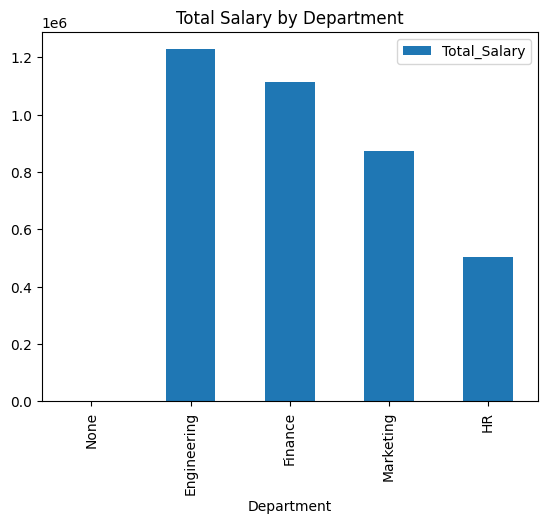

In [23]:
import matplotlib.pyplot as plt

# Convert Polars DataFrame to Pandas for visualization
grouped_data_pandas = grouped_data.to_pandas()

# Plot a bar chart
grouped_data_pandas.plot(kind='bar', x='Department', y='Total_Salary', title='Total Salary by Department')
plt.show()

### 13. Practice Exercises

1. Load the `drug200_missing.csv` dataset using Polars and display the first 10 rows.
2. Filter drugs with `Na_to_K` > 15 and calculate the average `Na_to_K` for each drug.
3. Add a new column to the `Employee_Data_missing.csv` dataset: `Is_High_Performer` (True if PerformanceRating > 4, else False).
4. Group the `drug200_missing.csv` dataset by `BP` (Blood Pressure) and calculate the average `Na_to_K` for each group.
5. Use lazy evaluation to filter employees with Salary > 70000 and calculate the total salary by Department.
6. Write a SQL-like query to find the top 3 highest-paid employees.

### 14. Main source and more practice

* https://docs.pola.rs/user-guide/getting-started/